We begin by importing the necessary libraries and loading the dataset into a pandas DataFrame.

In [283]:
import pandas as pd;
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/MyDrive/Colab Notebooks/Store_Sales/Walmart.csv'
df = pd.read_csv(file_path)

print("Walmart Sales Data head")
display(df.head())
print("\nData Information")
df.info()

Walmart Sales Data head


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106



Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Exploratory Data Analysis (EDA) & Preprocessing

In [284]:
#  Convert the 'Date' column from text to a datetime object
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')

# Sort the entire dataframe by date to ensure it's in chronological order
df = df.sort_values(['Date'])

print("Data Information after converting Date column:")
df.info()

# Check for and count any missing values in each column
print("\nMissing Values Count:")
print(df.isnull().sum())

Data Information after converting Date column:
<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 452.5 KB

Missing Values Count:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


Visualizing Overall Sales Trends

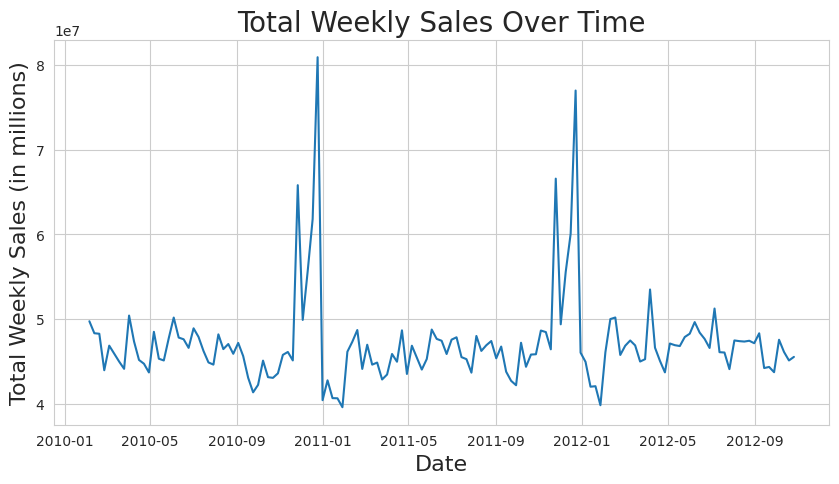

In [285]:
sns.set_style('whitegrid')
plt.figure(figsize= (10,5))
# To get total sales, we group by date and sum the sales across all stores.
total_sales_over_time = df.groupby('Date')['Weekly_Sales'].sum()

ax = sns.lineplot(x=total_sales_over_time.index, y=total_sales_over_time.values)
ax.set_title('Total Weekly Sales Over Time', fontsize= 20)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Total Weekly Sales (in millions)', fontsize=16)
plt.show()

Store Performance and Sales Distribution

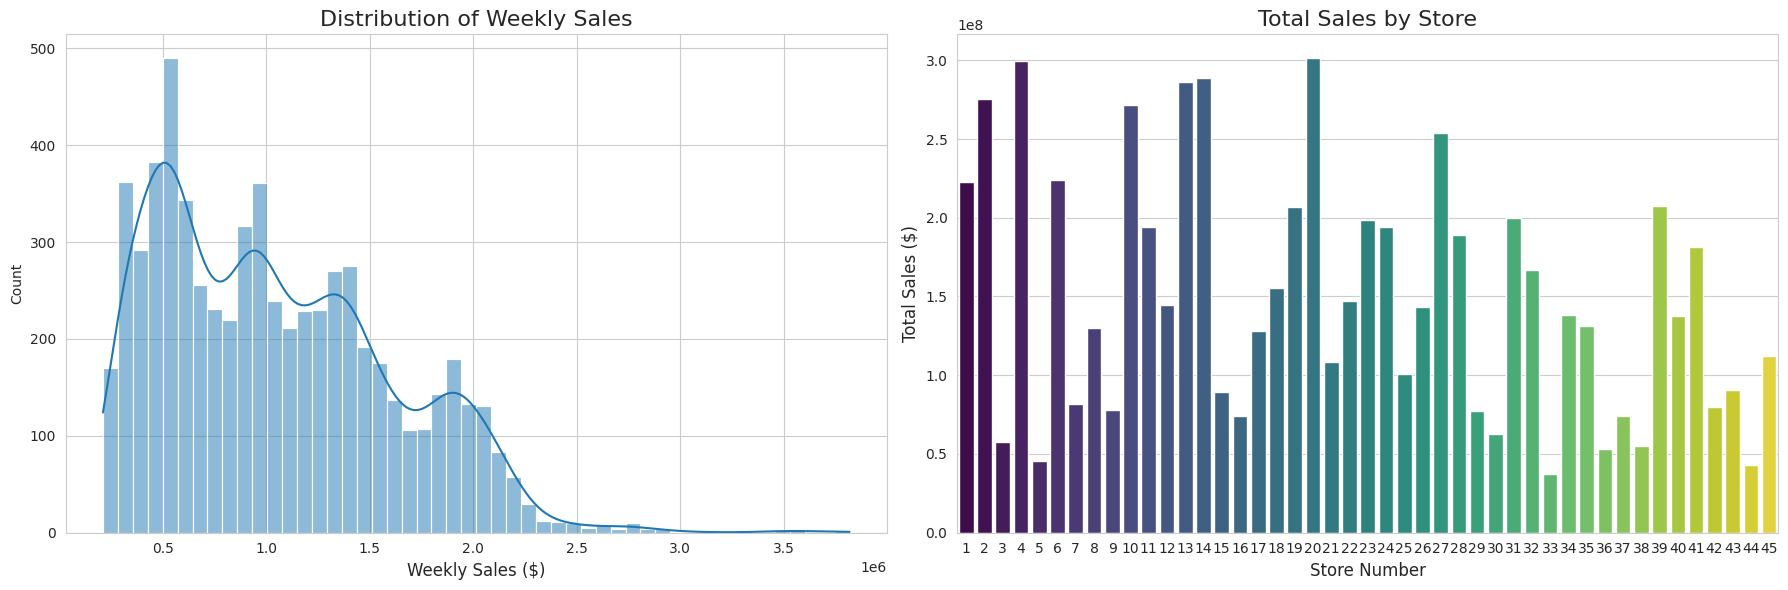

In [286]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# 1. Plotting the distribution of Weekly_Sales
sns.histplot(df['Weekly_Sales'], bins=50, kde=True, ax=axs[0])
axs[0].set_title('Distribution of Weekly Sales', fontsize=16)
axs[0].set_xlabel('Weekly Sales ($)', fontsize=12)

# 2. Plotting total sales by store
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
sns.barplot(x=store_sales.index, y=store_sales.values, ax=axs[1], palette='viridis', hue=store_sales.index, legend=False)
axs[1].set_title('Total Sales by Store', fontsize=16)
axs[1].set_xlabel('Store Number', fontsize=12)
axs[1].set_ylabel('Total Sales ($)', fontsize=12)

plt.tight_layout()
plt.show()

Create time-based features from the 'Date' column







In [287]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['DayOfWeek'] = df['Date'].dt.dayofweek

print("DataFrame with New Time-Based Features:")
display(df.head())

DataFrame with New Time-Based Features:


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,WeekOfYear,DayOfWeek
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,4
1287,10,2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765,2010,2,5,4
5148,37,2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554,2010,2,5,4
2288,17,2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548,2010,2,5,4
4147,30,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324,2010,2,5,4


Create Granular Holiday Features

In [288]:
import pandas as pd
import numpy as np

df['Is_Thanksgiving_Week'] = ((df['Month'] == 11) & (df['WeekOfYear'].isin([47, 48]))).astype(int)

df['Is_Christmas_Week'] = ((df['Month'] == 12) & (df['WeekOfYear'].isin([51, 52]))).astype(int)

df['Is_NewYear_Week'] = (((df['Month'] == 12) & (df['WeekOfYear'].isin([52, 53]))) | \
                         ((df['Month'] == 1) & (df['WeekOfYear'] == 1))).astype(int)

# Example for Super Bowl (typically first week of February, Week 5/6)
df['Is_SuperBowl_Week'] = ((df['Month'] == 2) & (df['WeekOfYear'].isin([5, 6]))).astype(int)

# Example for Easter (highly variable, might be harder to capture precisely by week alone)
# For Easter, a more robust way would be to calculate Easter date for each year and then derive the week.
df['Is_Easter_Week'] = (((df['Month'] == 3) & (df['WeekOfYear'].isin([12, 13, 14]))) | \
                       ((df['Month'] == 4) & (df['WeekOfYear'].isin([13, 14, 15, 16])))).astype(int)


# You can verify these new columns
print("DataFrame with New Holiday Features:")
display(df[['Date', 'Month', 'WeekOfYear', 'Holiday_Flag', 'Is_Thanksgiving_Week', 'Is_Christmas_Week', 'Is_NewYear_Week', 'Is_SuperBowl_Week', 'Is_Easter_Week']].head())
print(df[['Is_Thanksgiving_Week', 'Is_Christmas_Week', 'Is_NewYear_Week', 'Is_SuperBowl_Week', 'Is_Easter_Week']].sum()) # Count how many true instances there are

DataFrame with New Holiday Features:


,Date,Month,WeekOfYear,Holiday_Flag,Is_Thanksgiving_Week,Is_Christmas_Week,Is_NewYear_Week,Is_SuperBowl_Week,Is_Easter_Week
0,2010-02-05,2,5,0,0,0,0,1,0
1287,2010-02-05,2,5,0,0,0,0,1,0
5148,2010-02-05,2,5,0,0,0,0,1,0
2288,2010-02-05,2,5,0,0,0,0,1,0
4147,2010-02-05,2,5,0,0,0,0,1,0


Is_Thanksgiving_Week     90
Is_Christmas_Week       180
Is_NewYear_Week         180
Is_SuperBowl_Week       270
Is_Easter_Week          675
dtype: int64


Split data into train & test set

In [289]:
# Define our features (X) and target (y)
X = df.drop(['Weekly_Sales', 'Date'], axis=1)
y = df['Weekly_Sales']

split_date = '2012-07-01'
train_mask = (df['Date'] < split_date)
test_mask = (df['Date'] >= split_date)

X_train, X_test = X[train_mask], X[test_mask]
y_train, y_test = y[train_mask], y[test_mask]
print(f"Training set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")


Training set has 5670 samples.
Testing set has 765 samples.


Baseline Random Forest Regressor Model

In [290]:
from sklearn.ensemble import RandomForestRegressor;
from sklearn.metrics import mean_squared_error, mean_absolute_error

baselineRandomForest_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

print("\nTraining the model...")
baselineRandomForest_model.fit(X_train, y_train)
print("Model training complete.")

predictions_baslineRF = baselineRandomForest_model.predict(X_test)

mae_baselineRF = mean_absolute_error(y_test, predictions_baslineRF)
rmse_baslineRF = np.sqrt(mean_squared_error(y_test, predictions_baslineRF))

print(f"\nModel Performance on the Test Set:")
print(f"Baseline Random Forest Model MAE: ${mae_baselineRF:,.2f}")
print(f"Baseline Random Forest Model RMSE: ${rmse_baslineRF:,.2f}")


Training the model...
Model training complete.

Model Performance on the Test Set:
Baseline Random Forest Model MAE: $84,633.21
Baseline Random Forest Model RMSE: $169,759.88


Create Lag & Rolling Mean Features

In [291]:
# Sort data by store and then date
df = df.sort_values(['Store', 'Date'])

# We group by each store and then shift the sales data down by 1 week.
df['Weekly_Sales_Lag1'] = df.groupby('Store')['Weekly_Sales'].shift(1)

# We calculate the average sales over the last 4 weeks for each store.
df['Weekly_Sales_Roll_Mean4'] = df.groupby('Store')['Weekly_Sales'].rolling(window=4).mean().shift(1).reset_index(level=0, drop=True)

df = df.dropna()

print("DataFrame with Corrected Lag and Rolling Features:")
display(df[df['Store']==1].head())

DataFrame with Corrected Lag and Rolling Features:


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,WeekOfYear,DayOfWeek,Is_Thanksgiving_Week,Is_Christmas_Week,Is_NewYear_Week,Is_SuperBowl_Week,Is_Easter_Week,Weekly_Sales_Lag1,Weekly_Sales_Roll_Mean4
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,4,0,0,0,0,0,1409727.59,1.576836e+06
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,2010,3,10,4,0,0,0,0,0,1554806.68,1.554615e+06
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,2010,3,11,4,0,0,0,0,0,1439541.59,1.504011e+06
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,2010,3,12,4,0,0,0,0,1,1472515.79,1.469148e+06
8,1,2010-04-02,1594968.28,0,62.27,2.719,210.820450,7.808,2010,4,13,4,0,0,0,0,1,1404429.92,1.467823e+06


Random Forest Regressor Model with lag and rolling mean features

Retraining the model with new features...
Model training complete.

Random Forest Model (with lag & rolling mean features)Performance on the Test Set:
Random Forest Model MAE: $48,067.62
Random Forest Model RMSE: $69,103.09


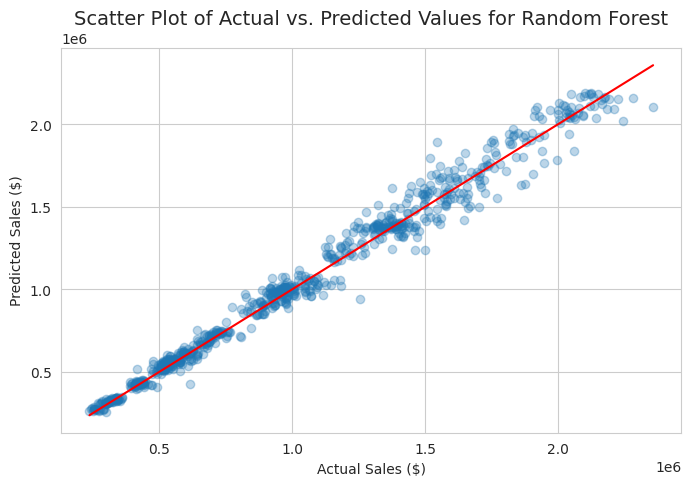

In [292]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Our new lag and rolling features are now included automatically.
X = df.drop(['Weekly_Sales', 'Date'], axis=1)
y = df['Weekly_Sales']

split_date = '2012-07-01'
train_mask = (df['Date'] < split_date)
test_mask = (df['Date'] >= split_date)

X_train, X_test = X[train_mask], X[test_mask]
y_train, y_test = y[train_mask], y[test_mask]

RandomForest_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

print("Retraining the model with new features...")
RandomForest_model.fit(X_train, y_train)
print("Model training complete.")

predictions_randomForest = RandomForest_model.predict(X_test)

mae_randomForest = mean_absolute_error(y_test, predictions_randomForest)
rmse_randomForest = np.sqrt(mean_squared_error(y_test, predictions_randomForest))

print(f"\nRandom Forest Model (with lag & rolling mean features)Performance on the Test Set:")
print(f"Random Forest Model MAE: ${mae_randomForest:,.2f}")
print(f"Random Forest Model RMSE: ${rmse_randomForest:,.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test, predictions_randomForest, alpha=0.3)

p1 = max(max(predictions_randomForest), max(y_test))
p2 = min(min(predictions_randomForest), min(y_test))
plt.plot([p1, p2], [p1, p2], 'r-')

plt.title('Scatter Plot of Actual vs. Predicted Values for Random Forest', fontsize=14)
plt.xlabel('Actual Sales ($)', fontsize=10)
plt.ylabel('Predicted Sales ($)', fontsize=10)
plt.show()

Feautre Importance Analysis

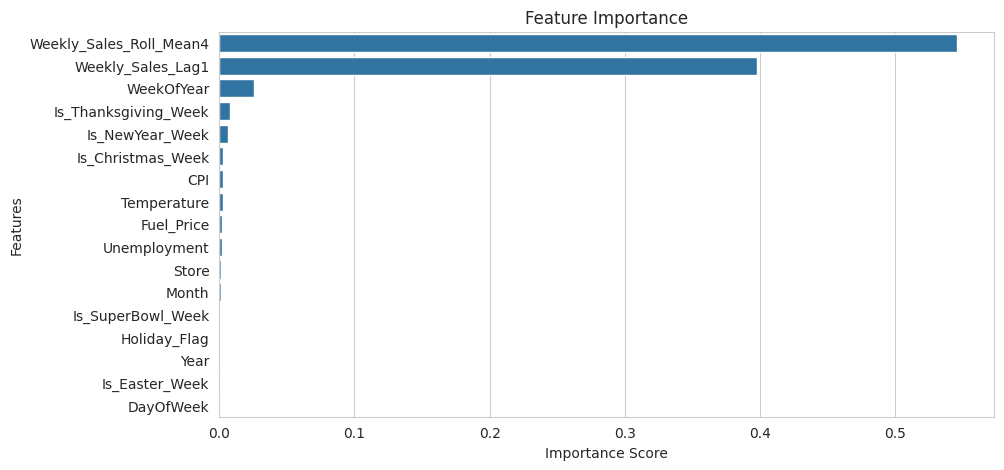

In [293]:
feature_importances = pd.Series(RandomForest_model.feature_importances_, index=X.columns)

sorted_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=sorted_importances, y=sorted_importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')

plt.show()

Ridge Model

In [294]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)

print("Training Ridge model...")
ridge_model.fit(X_train, y_train)
print("Model Training complete.")

predictions_ridge = ridge_model.predict(X_test)

mae_ridge = mean_absolute_error(y_test, predictions_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, predictions_ridge))

print(f"\nModel Performance on the Test Set:")
print(f"Ridge Model MAE: ${mae_ridge:,.2f}")
print(f"Ridge Model RMSE: ${rmse_ridge:,.2f}")


Training Ridge model...
Model Training complete.

Model Performance on the Test Set:
Ridge Model MAE: $50,939.34
Ridge Model RMSE: $72,921.34


Decision Tree Model (Pruned Tree)

In [295]:
from sklearn.tree import DecisionTreeRegressor

decisionTree_model = DecisionTreeRegressor(
    max_depth=10,
    min_samples_leaf=10,
    random_state=42
)

print("\nTraining Decision Tree model(Pruned)...")
decisionTree_model.fit(X_train, y_train)
print("Model traininf complete")

predictions_decisionTree = decisionTree_model.predict(X_test)
mae_decisionTree = mean_absolute_error(y_test, predictions_decisionTree)
rmse_decisionTree = np.sqrt(mean_squared_error(y_test, predictions_decisionTree))

print(f"\nModel Performance on the Test Set:")
print(f"Decision Tree Model MAE: ${mae_decisionTree:,.2f}")
print(f"Decision Tree Model RMSE: ${rmse_decisionTree:,.2f}")


Training Decision Tree model(Pruned)...
Model traininf complete

Model Performance on the Test Set:
Decision Tree Model MAE: $53,989.76
Decision Tree Model RMSE: $77,786.39


XGBoost Model



In [296]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    n_jobs=-1,
    objective='reg:squarederror',
    random_state=42
)

print("Training the XGBoost model")
xgb_model.fit(X_train, y_train)
print("Model training complete.")

predictions_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, predictions_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, predictions_xgb))

print(f"\nModel Performance on the Test Set:")
print(f"XGBoost Model MAE: ${mae_xgb:,.2f}")
print(f"XGBoost Model RMSE: ${rmse_xgb:,.2f}")

Training the XGBoost model
Model training complete.

Model Performance on the Test Set:
XGBoost Model MAE: $41,294.55
XGBoost Model RMSE: $59,574.93


LightGBM Model

In [297]:
# First, you may need to install
# !pip install lightgbm

import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(random_state=42)

print("\nTraining LightGBM model...")
lgb_model.fit(X_train, y_train)
print("Model training complete.")

predictions_lgb = lgb_model.predict(X_test)

mae_lgb = mean_absolute_error(y_test, predictions_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, predictions_lgb))

print(f"\nModel Performance on the Test Set:")
print(f"LightGBM Model MAE: ${mae_lgb:,.2f}")
print(f"LightGBM Model RMSE: ${rmse_lgb:,.2f}")


Training LightGBM model...
Model training complete.

Model Performance on the Test Set:
LightGBM Model MAE: $41,166.07
LightGBM Model RMSE: $59,735.79


Hyperparameter Tuning for XGBoost


Performing hyperparameter tuning for XGBoost...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

--- Tuning Complete ---
Best XGBoost Parameters: {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Tuned XGBoost MAE: $42,706.40
Tuned XGBoost RMSE: $62,903.71


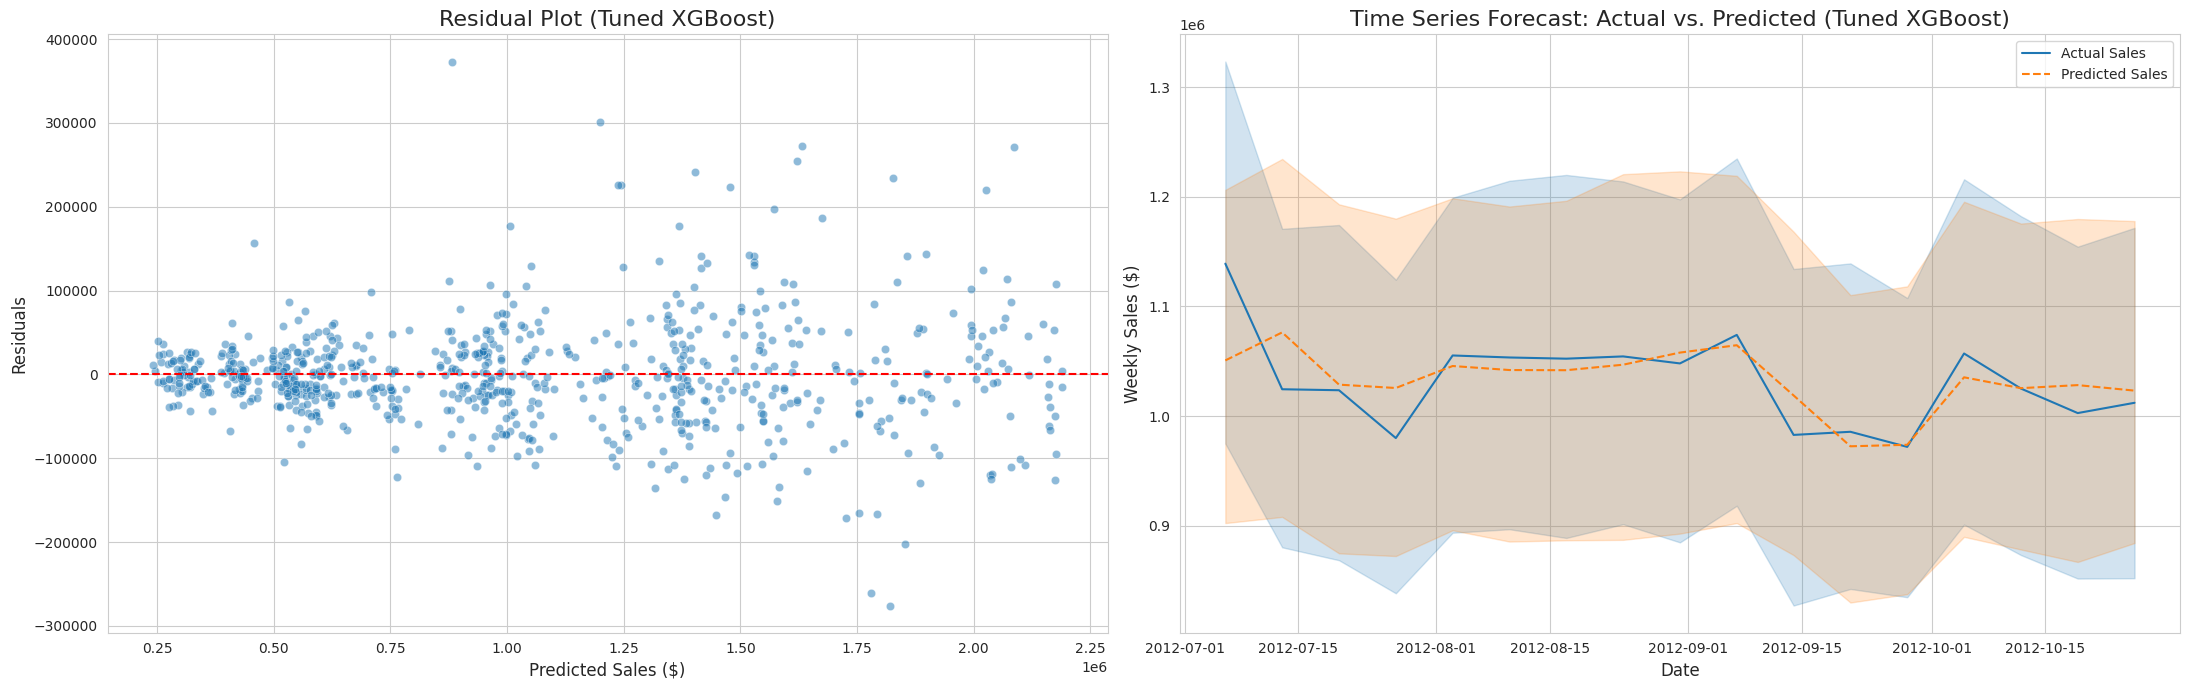

In [298]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

param_grid_xgb = {
    'n_estimators': [500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

xgb_random_search = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42),
    param_distributions=param_grid_xgb,
    n_iter=10,
    cv=3,       # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

print("\nPerforming hyperparameter tuning for XGBoost...")
xgb_random_search.fit(X_train, y_train)

best_xgb_model = xgb_random_search.best_estimator_
predictions_best_xgb = best_xgb_model.predict(X_test)
mae_best_xgb = mean_absolute_error(y_test, predictions_best_xgb)
rmse_best_xgb = np.sqrt(mean_squared_error(y_test, predictions_best_xgb))

print("\n--- Tuning Complete ---")
print(f"Best XGBoost Parameters: {xgb_random_search.best_params_}")
print(f"Tuned XGBoost MAE: ${mae_best_xgb:,.2f}")
print(f"Tuned XGBoost RMSE: ${rmse_best_xgb:,.2f}")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 7))

residuals = y_test - predictions_best_xgb
sns.scatterplot(x=predictions_best_xgb, y=residuals, ax=ax1, alpha=0.5)
ax1.axhline(y=0, color='r', linestyle='--')
ax1.set_title('Residual Plot (Tuned XGBoost)', fontsize=16)
ax1.set_xlabel('Predicted Sales ($)', fontsize=12)
ax1.set_ylabel('Residuals', fontsize=12)


plot_df = pd.DataFrame({
    'Date': df.loc[test_mask, 'Date'],
    'Actual': y_test,
    'Predicted': predictions_best_xgb
})
sns.lineplot(data=plot_df, x='Date', y='Actual', label='Actual Sales', ax=ax2)
sns.lineplot(data=plot_df, x='Date', y='Predicted', label='Predicted Sales', linestyle='--', ax=ax2)
ax2.set_title('Time Series Forecast: Actual vs. Predicted (Tuned XGBoost)', fontsize=16)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Weekly Sales ($)', fontsize=12)
ax2.legend()
plt.tight_layout()
plt.show()

Hyperparameter Tuning for LightGBM


Performing hyperparameter tuning for LightGBM...

LightGBM Tuning Complete
Best LightGBM Parameters: {'subsample': 0.9, 'reg_lambda': 0, 'reg_alpha': 0, 'num_leaves': 20, 'n_estimators': 500, 'min_child_samples': 30, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Tuned LightGBM MAE: $40,560.17
Tuned LightGBM RMSE: $59,097.44


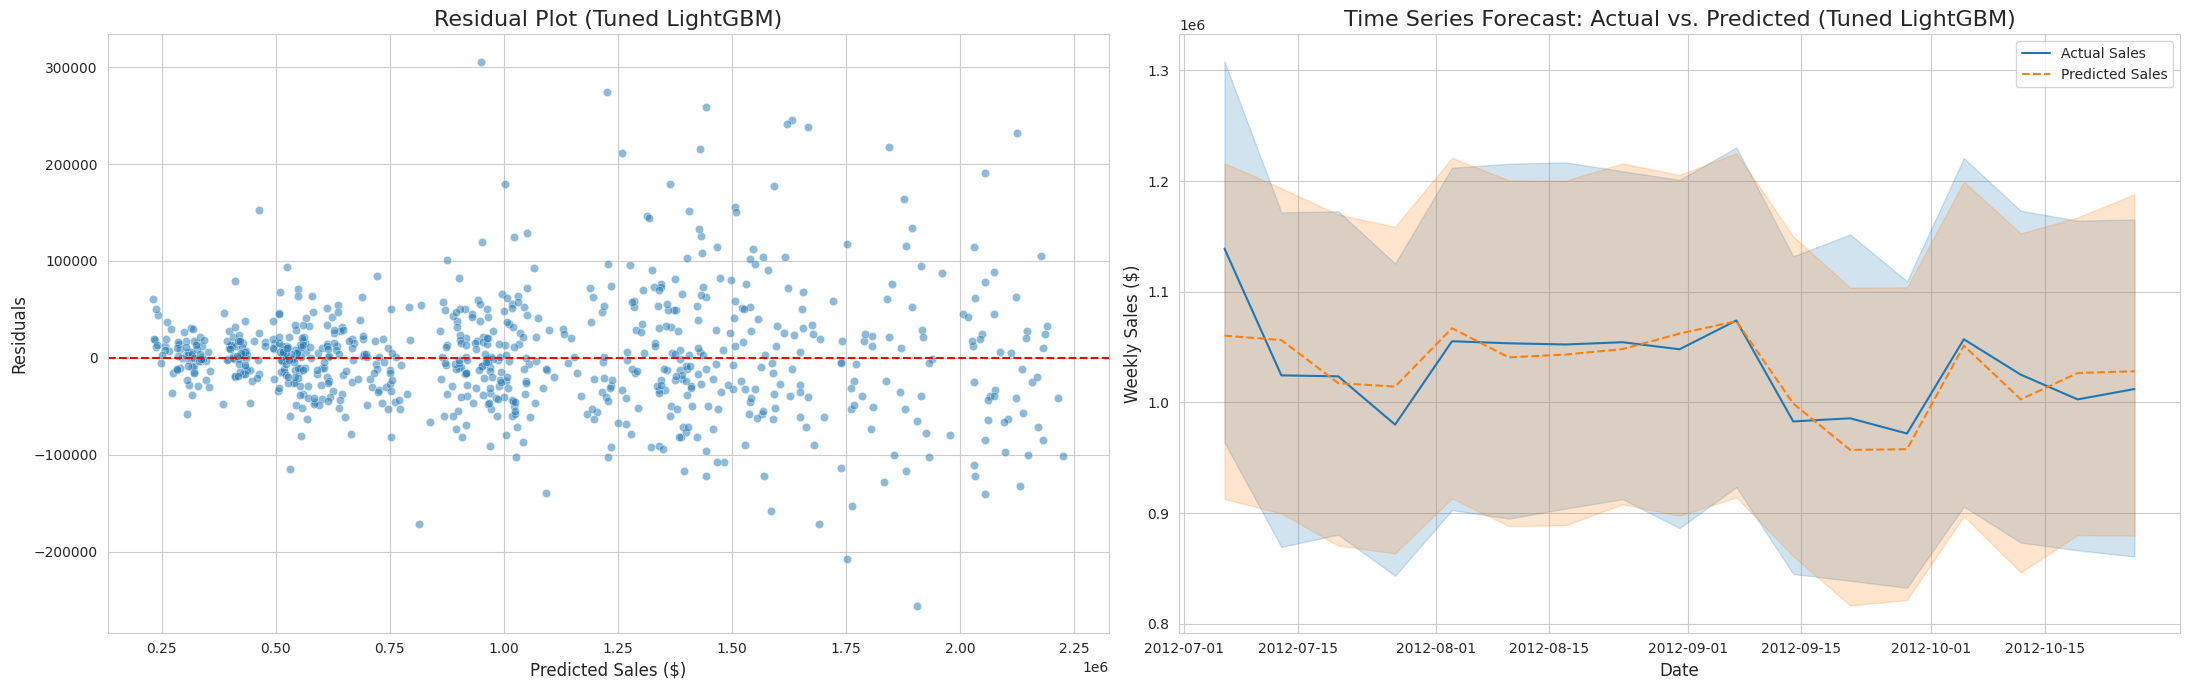

In [299]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

param_grid_lgb = {
    'n_estimators': [500, 800, 1200],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 40, 60],
    'max_depth': [5, 7, 10, -1],
    'min_child_samples': [20, 30, 50],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}


lgb_random_search = RandomizedSearchCV(
    estimator=lgb.LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1),
    param_distributions=param_grid_lgb,
    n_iter=5,
    cv=3,
    verbose=0,
    random_state=42,
    n_jobs=-1
)

print("\nPerforming hyperparameter tuning for LightGBM...")
lgb_random_search.fit(X_train, y_train)

best_lgb_model = lgb_random_search.best_estimator_

predictions_best_lgb = best_lgb_model.predict(X_test)

mae_best_lgb = mean_absolute_error(y_test, predictions_best_lgb)
rmse_best_lgb = np.sqrt(mean_squared_error(y_test, predictions_best_lgb))

print("\nLightGBM Tuning Complete")
print(f"Best LightGBM Parameters: {lgb_random_search.best_params_}")
print(f"Tuned LightGBM MAE: ${mae_best_lgb:,.2f}")
print(f"Tuned LightGBM RMSE: ${rmse_best_lgb:,.2f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 7))

residuals = y_test - predictions_best_lgb
sns.scatterplot(x=predictions_best_lgb, y=residuals, ax=ax1, alpha=0.5)
ax1.axhline(y=0, color='r', linestyle='--')
ax1.set_title('Residual Plot (Tuned LightGBM)', fontsize=16)
ax1.set_xlabel('Predicted Sales ($)', fontsize=12)
ax1.set_ylabel('Residuals', fontsize=12)

plot_df = pd.DataFrame({
    'Date': df.loc[test_mask, 'Date'],
    'Actual': y_test,
    'Predicted': predictions_best_lgb
})
sns.lineplot(data=plot_df, x='Date', y='Actual', label='Actual Sales', ax=ax2)
sns.lineplot(data=plot_df, x='Date', y='Predicted', label='Predicted Sales', linestyle='--', ax=ax2)
ax2.set_title('Time Series Forecast: Actual vs. Predicted (Tuned LightGBM)', fontsize=16)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Weekly Sales ($)', fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

Final Model Comparision


Final Model Comparison


,Model,MAE,RMSE
7,LightGBM (Tuned),40560.171605,59097.444971
4,LightGBM (Untuned),41166.074895,59735.786467
3,XGBoost (Untuned),41294.550424,59574.929969
5,XGBoost (Tuned),42706.403726,62903.708309
1,Random Forest (Lag Features),48067.617841,69103.088352
0,Ridge Regression,50939.340681,72921.338838
6,Decision Tree,53989.759076,77786.393148
2,Random Forest (Baseline),84633.205216,169759.880927


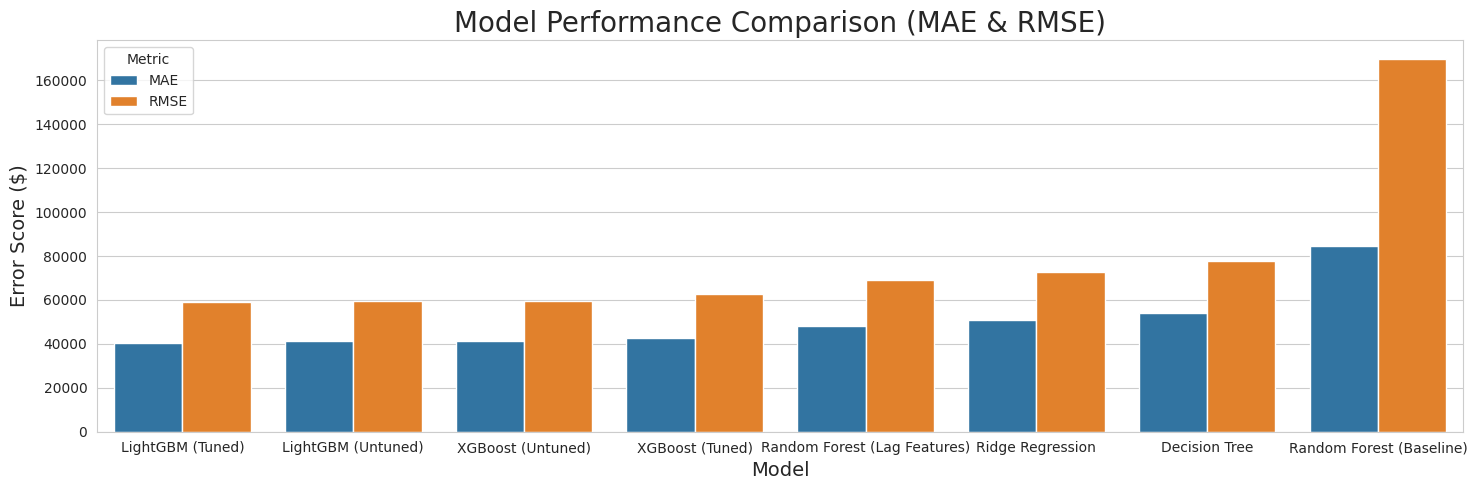

In [300]:
import pandas as pd

results = {
    'Model': [
        'Ridge Regression',
        'Random Forest (Lag Features)',
        'Random Forest (Baseline)',
        'XGBoost (Untuned)',
        'LightGBM (Untuned)',
        'XGBoost (Tuned)',
        'Decision Tree',
        'LightGBM (Tuned)'
    ],
    'MAE': [
        mae_ridge,
        mae_randomForest,
        mae_baselineRF,
        mae_xgb,
        mae_lgb,
        mae_best_xgb,
        mae_decisionTree,
        mae_best_lgb
    ],
    'RMSE': [
        rmse_ridge,
        rmse_randomForest,
        rmse_baslineRF,
        rmse_xgb,
        rmse_lgb,
        rmse_best_xgb,
        rmse_decisionTree,
        rmse_best_lgb
    ]
}

results_df = pd.DataFrame(results).sort_values(by='MAE', ascending=True)

print("\nFinal Model Comparison")
display(results_df)

results_df = results_df.sort_values(by='MAE')
df_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(15, 5))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric')

plt.title('Model Performance Comparison (MAE & RMSE)', fontsize=20)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Error Score ($)', fontsize=14)
plt.tight_layout()
plt.show()